In [1]:
import wfdb
import numpy as np
import os

directory = "./datos/"
ECGs = []
for ecgfilename in sorted(os.listdir(directory)):
    if ecgfilename.endswith(".dat"):
        try:
            ecg = wfdb.rdsamp(directory + ecgfilename.split(".")[0])
            ECGs.append(ecg[0]) 
        except Exception as e:
            print(f"Error al leer el archivo {ecgfilename}: {e}")
ECGs = np.asarray(ECGs)
print(len(ECGs))


28


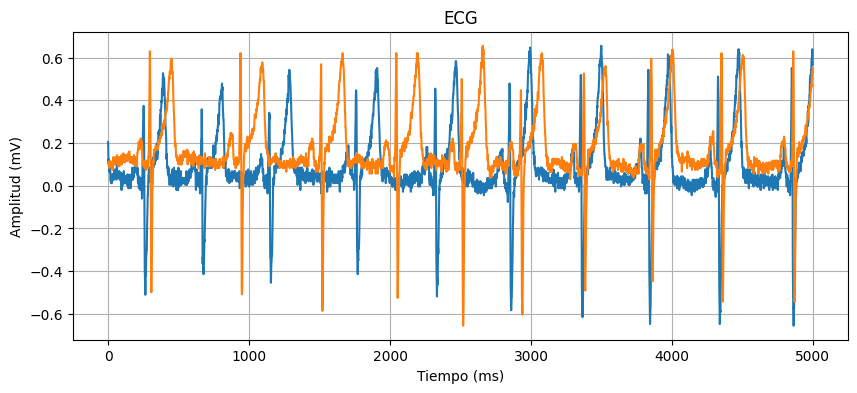

In [2]:
#grafico
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
plt.plot(ECGs[0][:,0])
plt.plot(ECGs[1][:,0])
plt.title('ECG')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Amplitud (mV)')
plt.grid()

ECG 0 es similar a los ECGs []
ECG 1 es similar a los ECGs []
ECG 2 es similar a los ECGs []
ECG 3 es similar a los ECGs []
ECG 4 es similar a los ECGs []
ECG 5 es similar a los ECGs []
ECG 6 es similar a los ECGs []
ECG 7 es similar a los ECGs []
ECG 8 es similar a los ECGs []
ECG 9 es similar a los ECGs [21]


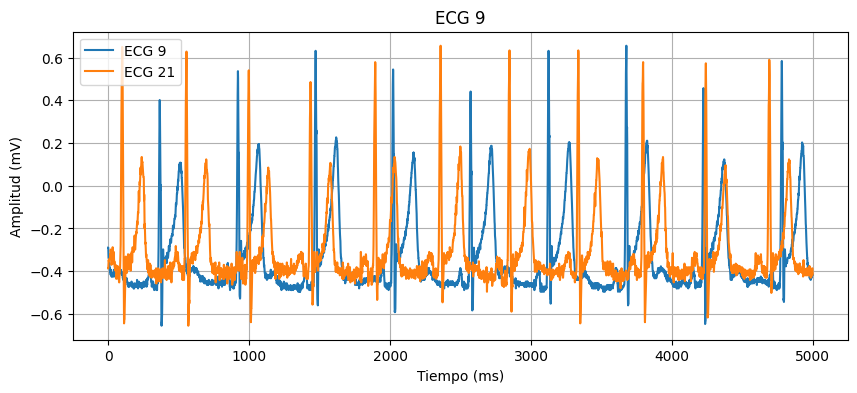

ECG 10 es similar a los ECGs []
ECG 11 es similar a los ECGs []
ECG 12 es similar a los ECGs []
ECG 13 es similar a los ECGs [18]


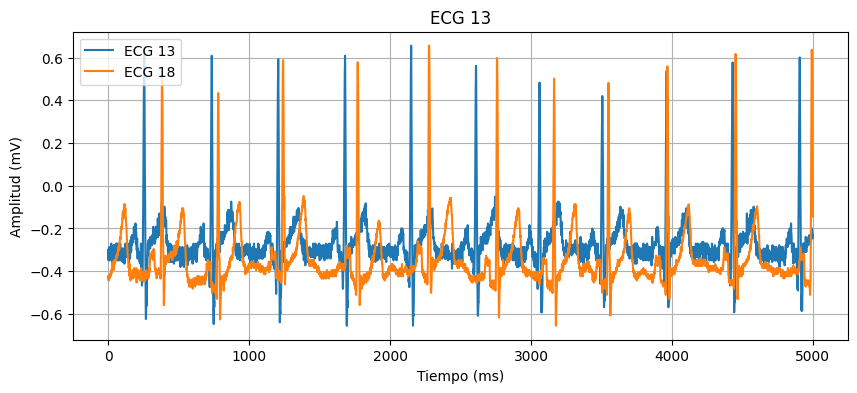

ECG 14 es similar a los ECGs []
ECG 15 es similar a los ECGs []
ECG 16 es similar a los ECGs []
ECG 17 es similar a los ECGs []
ECG 18 es similar a los ECGs [13]


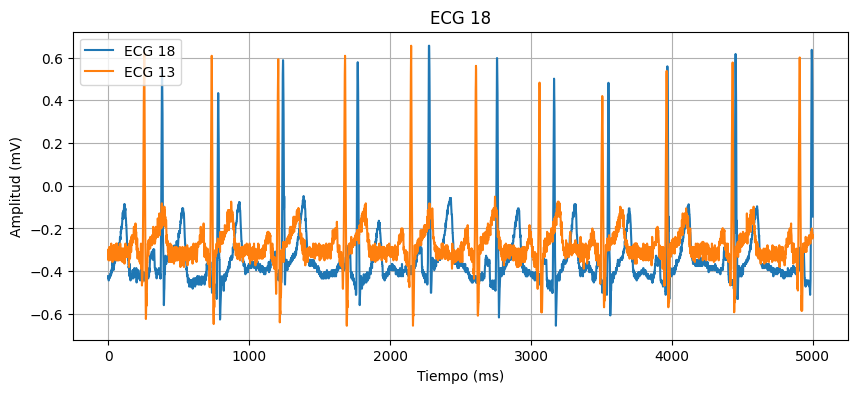

ECG 19 es similar a los ECGs []
ECG 20 es similar a los ECGs []
ECG 21 es similar a los ECGs [9]


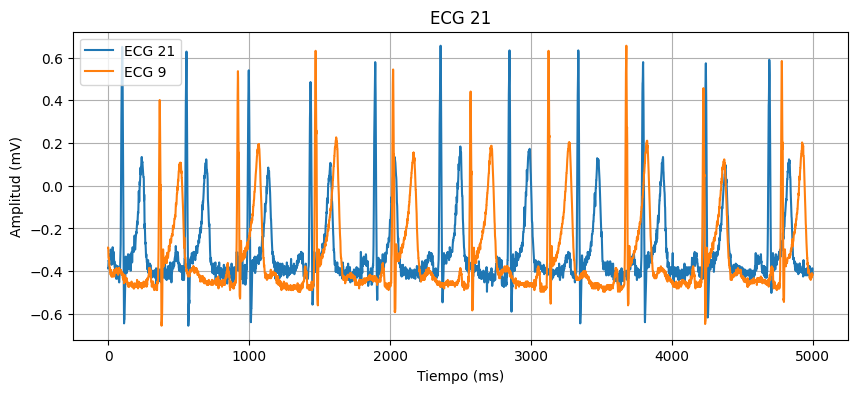

ECG 22 es similar a los ECGs []
ECG 23 es similar a los ECGs []
ECG 24 es similar a los ECGs []
ECG 25 es similar a los ECGs []
ECG 26 es similar a los ECGs []
ECG 27 es similar a los ECGs []


In [18]:
#buscar ECG similares entre todos los ECGs
from scipy.signal import find_peaks
from scipy.spatial.distance import euclidean

def find_similar_ecgs(ecg, ECGs, threshold=2000):
    similar_ecgs = []
    for i, ecg2 in enumerate(ECGs):
        if not np.array_equal(ecg, ecg2):
            peaks1, _ = find_peaks(ecg[:,0], height=0)
            peaks2, _ = find_peaks(ecg2[:,0], height=0)
            
            # Ensure the peaks arrays are of the same length
            if len(peaks1) > len(peaks2):
                peaks2 = np.pad(peaks2, (0, len(peaks1) - len(peaks2)), 'constant')
            else:
                peaks1 = np.pad(peaks1, (0, len(peaks2) - len(peaks1)), 'constant')
                
            distance = euclidean(peaks1, peaks2)
            if distance < threshold:
                similar_ecgs.append(i)
    return similar_ecgs

for i, ecg in enumerate(ECGs):
    similar_ecgs = find_similar_ecgs(ecg, ECGs)
    print(f"ECG {i} es similar a los ECGs {similar_ecgs}")
    if len(similar_ecgs) > 0:
        plt.figure(figsize=(10, 4))
        plt.plot(ecg[:,0])
        for similar_ecg in similar_ecgs:
            plt.plot(ECGs[similar_ecg][:,0])
            #etiqueta de color
            plt.legend([f'ECG {i}'] + [f'ECG {similar_ecg}' for similar_ecg in similar_ecgs])
        plt.title(f'ECG {i}')
        plt.xlabel('Tiempo (ms)')
        plt.ylabel('Amplitud (mV)')
        plt.grid()
        plt.show()

ECGs en el cluster 0: [ 4  5 11 13 14 18 21 22 23 25]


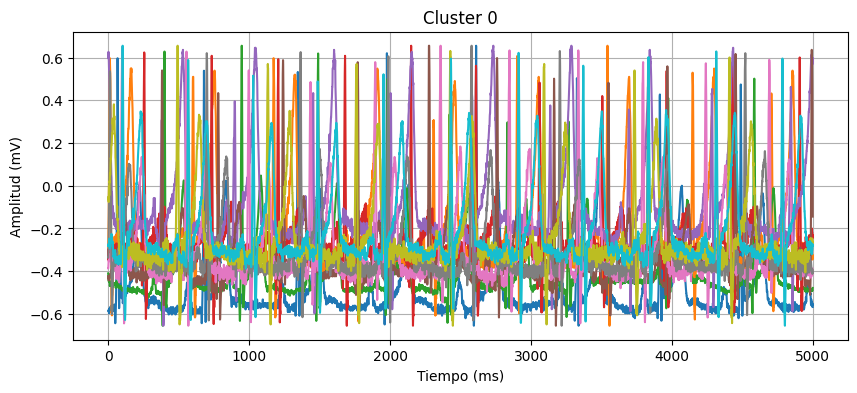

ECGs en el cluster 1: [ 0  1  2  3  6  7  8  9 10 12 15 16 17 19 20 24 26 27]


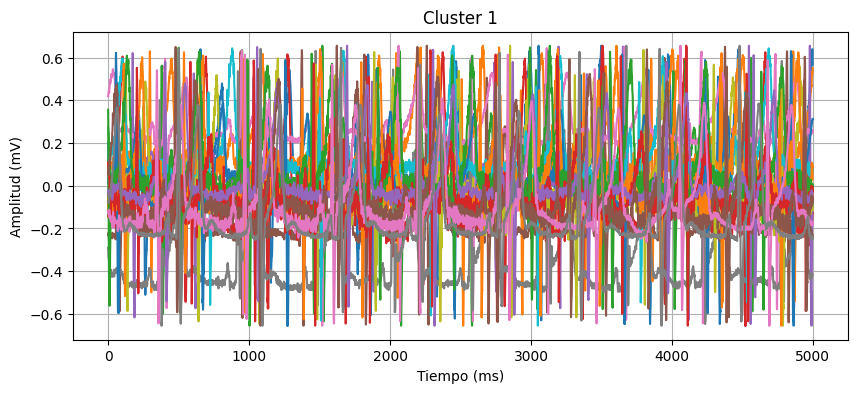

In [4]:
#buscar ECGs con la misma enfermedad

#%pip install scikit-learn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def find_ecgs_with_same_disease(ECGs, n_clusters=2):
    # Reshape ECGs to 2D
    reshaped_ECGs = [ecg.flatten() for ecg in ECGs]
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(reshaped_ECGs)
    return kmeans.labels_

n_clusters = 2
labels = find_ecgs_with_same_disease(ECGs, n_clusters)
for i in range(n_clusters):
    cluster = np.where(labels == i)[0]
    print(f"ECGs en el cluster {i}: {cluster}")
    plt.figure(figsize=(10, 4))
    for j in cluster:
        plt.plot(ECGs[j][:,0])
    plt.title(f'Cluster {i}')
    plt.xlabel('Tiempo (ms)')
    plt.ylabel('Amplitud (mV)')
    plt.grid()
    plt.show()

A traves de las etiquetas en .hea se puede saber si tienen la misma enfermedad\n
Se pueden usar las etiquetas para clasificar los ECGs\n
Se pueden usar las etiquetas para entrenar un modelo de clasificacion

In [5]:
#Clasificar los ECGs
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Leer las etiquetas de los ECGs
etiquestasSL12 = []
etiquestasCardiologos = []
for ecgfilename in sorted(os.listdir(directory)):
    # Solo leer los archivos .hea desde el ath_001 hasta el ath_019
    if ecgfilename.endswith(".hea"):
        with open(directory + ecgfilename) as f:
            lines = f.readlines()
            for line in lines:
                if line.startswith("#SL12:"):
                    etiquestasSL12.append(line.split(": ")[1].strip())
                elif line.startswith("#C:"):
                    etiquetas = line.split(": ")[1].strip()
                    etiquetas = etiquetas.split(", ")
                    etiquestasCardiologos.append(etiquetas)

#impriir las etiquetas
print(etiquestasSL12)
print(etiquestasCardiologos)





['Sinus bradycardia with marked sinus arrhythmia, Right axis deviation, Borderline ECG', 'Sinus bradycardia with marked sinus arrhythmia, Right axis deviation, Borderline ECG', 'Sinus bradycardia with marked sinus arrhythmia, Left axis deviation, Abnormal ECG', 'Sinus bradycardia, Right axis deviation, Borderline ECG', 'Sinus bradycardia and sinus arrhythmia and first degree AV block, Otherwise normal ECG', 'Sinus bradycardia, Otherwise normal ECG', '***Critical test result', "Normal sinus rhythm, RSR' or QR pattern in V1 suggests right ventricular conduction delay, Borderline ECG", 'Sinus bradycardia, First degree AV block, Right axis deviation, Borderline ECG', '***Critical test result', 'Normal sinus rhythm with sinus arrhythmia, Normal ECG', 'Sinus bradycardia with marked sinus arrhythmia, Otherwise normal ECG', 'Marked sinus bradycardia, Right axis deviation, Abnormal ECG', 'Normal sinus rhythm, Lateral infarction age not determined, Abnormal ECG', 'Sinus bradycardia, Otherwise no

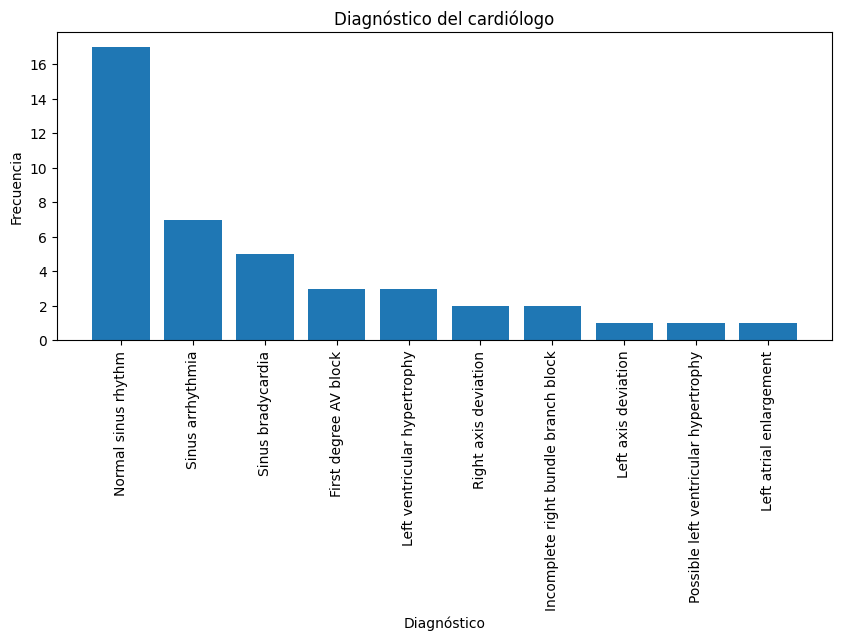

In [6]:
#grafico de diagnostico general de cardiologos
import matplotlib.pyplot as plt
from collections import Counter

# Contar las etiquetas que no contienen la palabra 'ECG'
counter = Counter([item for sublist in etiquestasCardiologos for item in sublist if 'ECG' not in item and 'electrodes' not in item])

#ordenar las etiquetas de mayor a menor frecuencia
counter = dict(sorted(counter.items(), key=lambda item: item[1], reverse=True))

# Graficar las etiquetas de menor a mayor frecuencia
plt.figure(figsize=(10, 4))
plt.bar(counter.keys(), counter.values())
plt.title('Diagnóstico del cardiólogo')
plt.xlabel('Diagnóstico')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()





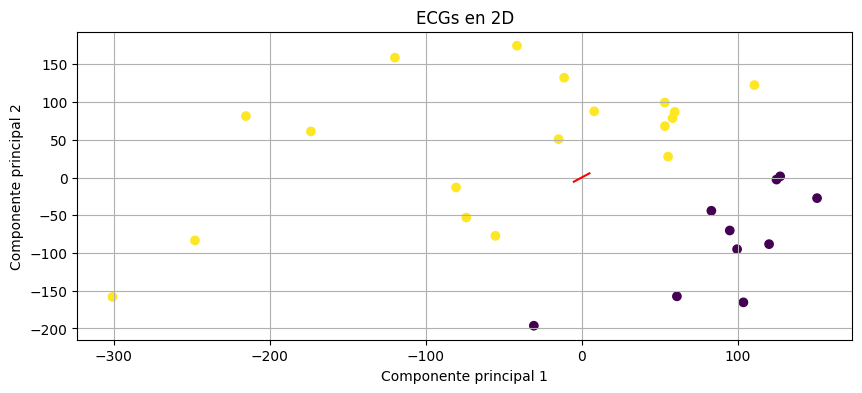

Hombres en el cluster 0: 10
Mujeres en el cluster 1: 18


In [7]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Normalizar los ECGs
scaler = StandardScaler()
normalized_ECGs = scaler.fit_transform([ecg.flatten() for ecg in ECGs])

# Reducir la dimensionalidad de los ECGs
pca = PCA(n_components=2)
principal_components = pca.fit_transform(normalized_ECGs)

# Clasificar los ECGs 
kmeans = KMeans(n_clusters=2)
kmeans.fit(principal_components)

# Graficar los ECGs en 2D con los clusters con linea de separacion entre los clusters
plt.figure(figsize=(10, 4))
plt.scatter(principal_components[:,0], principal_components[:,1], c=kmeans.labels_)

# Dibujar la línea de separación entre los clusters
x = np.linspace(-5, 5, 100) # Rango de valores de x para la línea de separación 
y = -kmeans.cluster_centers_[0][0]/kmeans.cluster_centers_[0][1] * x
plt.plot(x, y, color='red')

plt.title('ECGs en 2D')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.grid()
plt.show()

#cantidad de hombres y mujeres en cada cluster
cluster0 = np.where(kmeans.labels_ == 0)[0]
cluster1 = np.where(kmeans.labels_ == 1)[0]
print(f"Hombres en el cluster 0: {len(cluster0)}")
print(f"Mujeres en el cluster 1: {len(cluster1)}")


{'First degree AV block', 'Right axis deviation', 'Sinus arrhythmia', 'Left ventricular hypertrophy', 'Left atrial enlargement', 'Normal sinus rhythm', 'Left axis deviation', 'Possible left ventricular hypertrophy', 'Incomplete right bundle branch block', 'Sinus bradycardia'}


C:\Users\yanko\AppData\Local\Temp\ipykernel_22556\272995561.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(unique_labels))


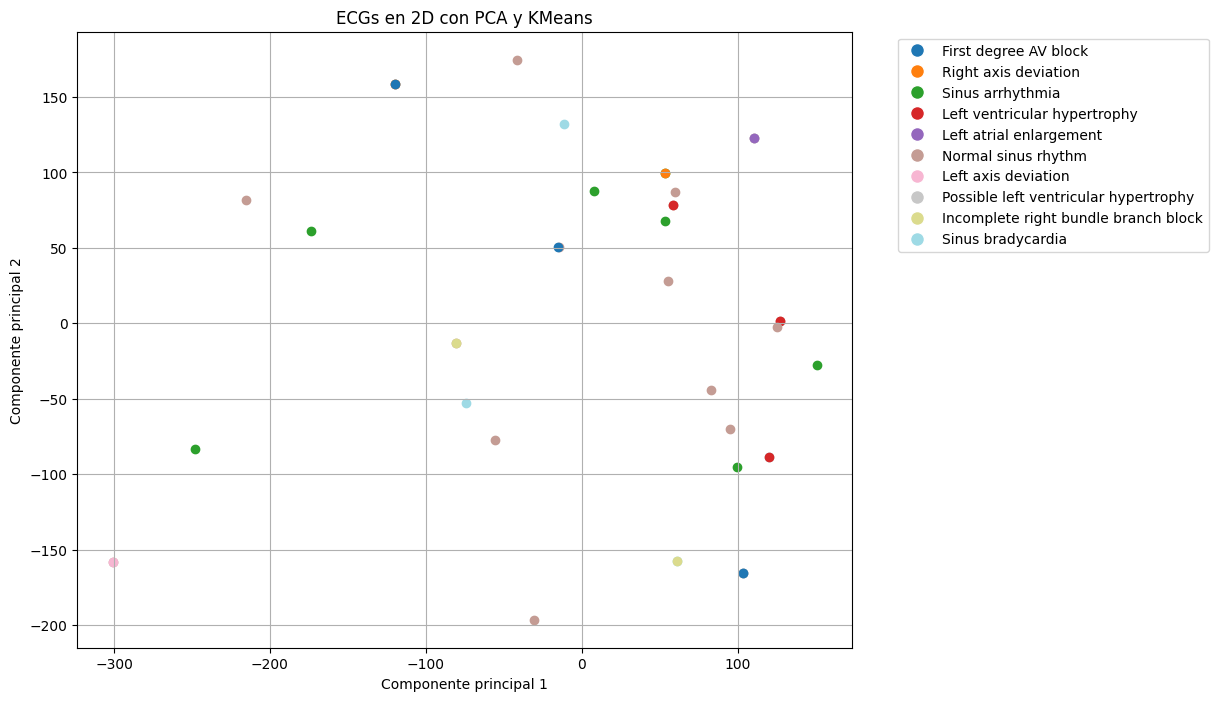

Unique labels:  {'First degree AV block', 'Right axis deviation', 'Sinus arrhythmia', 'Left ventricular hypertrophy', 'Left atrial enlargement', 'Normal sinus rhythm', 'Left axis deviation', 'Possible left ventricular hypertrophy', 'Incomplete right bundle branch block', 'Sinus bradycardia'}
Labels:  [['Sinus arrhythmia'], ['Sinus arrhythmia', 'Right axis deviation'], ['Normal sinus rhythm', 'Left axis deviation'], ['Normal sinus rhythm'], ['Sinus bradycardia', 'Normal sinus rhythm', 'First degree AV block'], ['Normal sinus rhythm', 'Left ventricular hypertrophy'], ['Normal sinus rhythm'], ['Normal sinus rhythm', 'Incomplete right bundle branch block'], ['Normal sinus rhythm', 'Right axis deviation', 'First degree AV block'], ['Normal sinus rhythm', 'Possible left ventricular hypertrophy', 'Left atrial enlargement'], ['Sinus arrhythmia'], ['Sinus arrhythmia'], ['Sinus bradycardia'], ['Normal sinus rhythm'], ['Normal sinus rhythm'], ['Normal sinus rhythm'], ['Normal sinus rhythm', 'Firs

In [8]:
#mostrar los ECGs por etiquetas con PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#identificar las etiquetas unicas para usar PCA con las etiquetas
unique_labels = set([item for sublist in etiquestasCardiologos for item in sublist if 'ECG' not in item and 'electrodes' not in item])
print(unique_labels)

# Normalizar los ECGs
scaler = StandardScaler()
normalized_ECGs = scaler.fit_transform([ecg.flatten() for ecg in ECGs])

# Reducir la dimensionalidad de los ECGs
pca = PCA(n_components=2)
principal_components = pca.fit_transform(normalized_ECGs)

# Clasificar los ECGs por etiquetas
kmeans = KMeans(n_clusters=len(unique_labels))
kmeans.fit(principal_components)

# Graficar los ECGs en 2D con los clusters con leyenda de etiquetas
plt.figure(figsize=(10, 8))

# Crear un mapa de colores para las etiquetas
colors = plt.cm.get_cmap('tab20', len(unique_labels))

# Crear un diccionario para asignar colores a las etiquetas
label_color_map = {label: colors(i) for i, label in enumerate(unique_labels)}

# Graficar cada punto
for i, (x, y) in enumerate(principal_components):
    labels = etiquestasCardiologos[i]
    #elminar las etiquetas que contienen la palabra ECG y electrodes
    labels = [label for label in labels if 'ECG' not in label and 'electrodes' not in label]
    if len(labels) > 1:
        # Si el punto tiene varias etiquetas, dividir el punto en varias partes
        for j, label in enumerate(labels):
            angle = 2 * np.pi * j / len(labels)
            dx = 0.05 * np.cos(angle)
            dy = 0.05 * np.sin(angle)
            plt.scatter(x + dx, y + dy, color=label_color_map[label], label=label if i == 0 else "")
    else:
        plt.scatter(x, y, color=label_color_map[labels[0]], label=labels[0] if i == 0 else "")

# Crear la leyenda
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=label_color_map[label], markersize=10) for label in unique_labels]
plt.legend(handles, unique_labels, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('ECGs en 2D con PCA y KMeans')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.grid()
plt.show()

print("Unique labels: ", unique_labels)
#etiquetas cardilogos que eliminan las etiquetas que contienen la palabra ECG y electrodes
etiquetas = [[label for label in labels if 'ECG' not in label and 'electrodes' not in label] for labels in etiquestasCardiologos]

print("Labels: ", etiquetas)
#cantidad de etiquetas
print("Cantidad de etiquetas: ", len(etiquetas))


ECG 2 es Borderline ECG
Etiquetas: ['Normal sinus rhythm', 'Left axis deviation', 'Borderline ECG']
ECG 9 es Borderline ECG
Etiquetas: ['Normal sinus rhythm', 'Possible left ventricular hypertrophy', 'Left atrial enlargement', 'Misplaced electrodes', 'Borderline ECG']


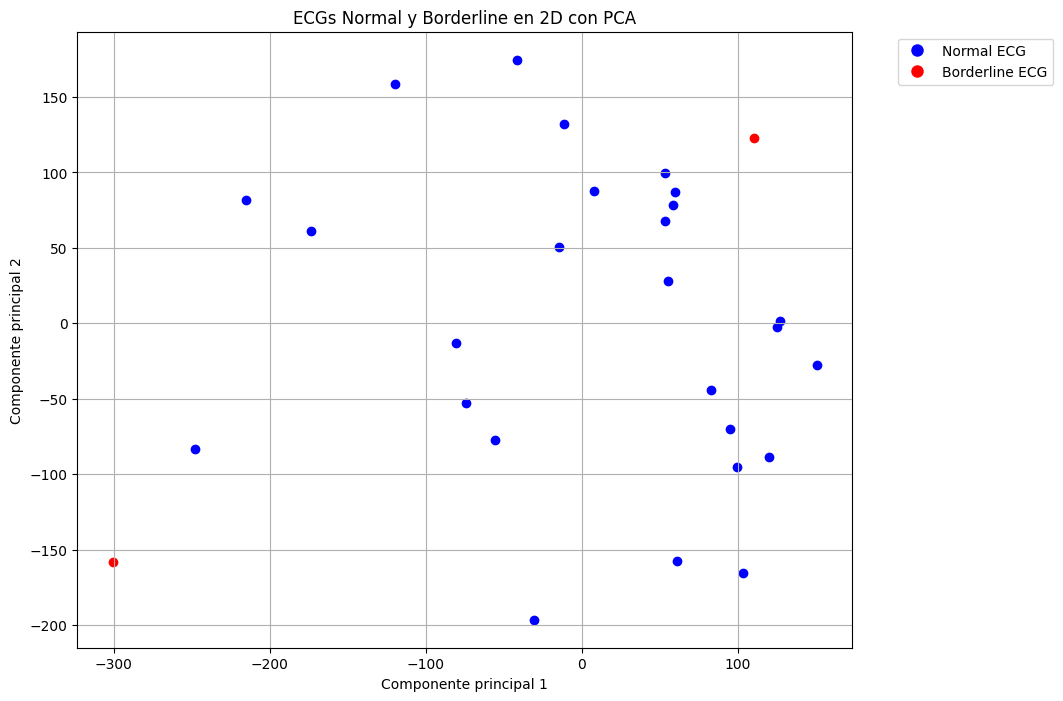

In [9]:
#graficar ECGs normal y borderline

#es normal si tiene la etiqueta 'Normal ECG'
#es borderline si tiene la etiqueta 'Borderline ECG'

# Normalizar los ECGs
scaler = StandardScaler()
normalized_ECGs = scaler.fit_transform([ecg.flatten() for ecg in ECGs])

# Reducir la dimensionalidad de los ECGs
pca = PCA(n_components=2)
principal_components = pca.fit_transform(normalized_ECGs)

# Clasificar los ECGs por etiquetas
kmeans = KMeans(n_clusters=2)
kmeans.fit(principal_components)

# Graficar los ECGs en 2D con los clusters con leyenda de etiquetas
plt.figure(figsize=(10, 8))
# Crear un mapa de colores para las etiquetas
#azul para normal y naranja para borderline
label_color_map = {'Normal ECG': 'blue', 'Borderline ECG': 'red'}

# Graficar cada punto
for i, (x, y) in enumerate(principal_components):
    labels = etiquestasCardiologos[i]
    if 'Normal ECG' in labels:
        plt.scatter(x, y, color='blue', label='Normal ECG' if i == 0 else "")
    if 'Borderline ECG' in labels:
        plt.scatter(x, y, color='red', label='Borderline ECG' if i == 0 else "")
        print(f"ECG {i} es Borderline ECG")
        print(f"Etiquetas: {labels}")

# Crear la leyenda
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=label_color_map[label], markersize=10) for label in label_color_map]
plt.legend(handles, label_color_map.keys(), bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('ECGs Normal y Borderline en 2D con PCA')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.grid()
plt.show()

Clasificador de múltiples etiquetas

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer

# Convertir las señales a la forma adecuada (samples, timesteps, features)
x = np.array(ECGs).reshape(len(ECGs), -1)  # Convertir a array y aplanar las señales de ECG

# Convertir las etiquetas a un formato binarizado
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(etiquestasCardiologos)

# Codificar las etiquetas
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform([str(label) for label in y])  

# Asegurarse de que ECGs y y tengan la misma longitud
print(len(ECGs))
print(len(y))


# Dividir en entrenamiento y pruebas
senales_entrenamiento, senales_prueba, etiquetas_entrenamiento, etiquetas_prueba = train_test_split(x, y_encoded, test_size=0.2, random_state=42)


28
28


In [11]:
from sklearn.preprocessing import MultiLabelBinarizer

# Convertir las señales a la forma adecuada (samples, timesteps, features)
x = np.array(ECGs).reshape(len(ECGs), -1)  # Convertir a array y aplanar las señales de ECG

# Binarizar las etiquetas
mlb = MultiLabelBinarizer()
etiquetas_binarizadas = mlb.fit_transform(etiquestasCardiologos)

print(len(ECGs))
print(len(etiquestasCardiologos))
print(len(etiquetas_binarizadas))

# Dividir los datos en entrenamiento y prueba
senales_entrenamiento, senales_prueba, etiquetas_entrenamiento, etiquetas_prueba = train_test_split(x, etiquetas_binarizadas, test_size=0.2, random_state=42)


28
28
28


In [12]:
from collections import Counter
etiqueta_counts = Counter([tuple(etiqueta) for etiqueta in etiquestasCardiologos])
print("Distribución de las etiquetas:", etiqueta_counts)


Distribución de las etiquetas: Counter({('Normal sinus rhythm', 'Normal ECG'): 9, ('Sinus arrhythmia', 'Normal ECG'): 6, ('Normal sinus rhythm', 'Left ventricular hypertrophy', 'Normal ECG'): 2, ('Sinus bradycardia', 'Normal ECG'): 2, ('Sinus arrhythmia', 'Right axis deviation', 'Normal ECG'): 1, ('Normal sinus rhythm', 'Left axis deviation', 'Borderline ECG'): 1, ('Sinus bradycardia', 'Normal sinus rhythm', 'First degree AV block', 'Normal ECG'): 1, ('Normal sinus rhythm', 'Incomplete right bundle branch block', 'Normal ECG'): 1, ('Normal sinus rhythm', 'Right axis deviation', 'First degree AV block', 'Normal ECG'): 1, ('Normal sinus rhythm', 'Possible left ventricular hypertrophy', 'Left atrial enlargement', 'Misplaced electrodes', 'Borderline ECG'): 1, ('Normal sinus rhythm', 'First degree AV block', 'Normal ECG'): 1, ('Sinus bradycardia', 'Left ventricular hypertrophy', 'Normal ECG'): 1, ('Sinus bradycardia', 'Incomplete right bundle branch block', 'Normal ECG'): 1})


In [13]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import check_random_state
from sklearn.preprocessing import LabelBinarizer
from sklearn.multioutput import ClassifierChain
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
import numpy as np

# Convertir las señales a la forma adecuada (samples, timesteps, features)
x = np.array(ECGs).reshape(len(ECGs), -1)  # Aplanar las señales de ECG

# Binarizar las etiquetas
mlb = MultiLabelBinarizer()
etiquetas_binarizadas = mlb.fit_transform(etiquestasCardiologos)

# Convertir las etiquetas multilabel en un solo vector utilizando LabelBinarizer
label_binarizer = LabelBinarizer()
y_multiclass = label_binarizer.fit_transform(etiquetas_binarizadas)

# Convertir las etiquetas multilabel a formato binario
y_binary = np.array([int(''.join(map(str, row)), 2) for row in y_multiclass])

# Aplicar Random Oversampling a las señales y etiquetas convertidas
ros = RandomOverSampler(random_state=42)
x_resampled, y_resampled_binary = ros.fit_resample(x, y_binary)

# Convertir de vuelta las etiquetas binarias a multilabel
y_resampled_multilabel = np.array([list(map(int, bin(label)[2:].zfill(y_multiclass.shape[1]))) for label in y_resampled_binary])

# Dividir los datos en entrenamiento y prueba
senales_entrenamiento_over, senales_prueba_over, etiquetas_entrenamiento_over, etiquetas_prueba_over = train_test_split(
    x_resampled, y_resampled_multilabel, test_size=0.2, random_state=42
)

#comparar el tamaño de los datos originales y los datos aumentados
print("Tamaño de las señales originales:", x.shape)
print("Tamaño de las etiquetas originales:", y_multiclass.shape)
print("Tamaño de las señales aumentadas:", x_resampled.shape)
print("Tamaño de las etiquetas aumentadas:", y_resampled_multilabel.shape)



Tamaño de las señales originales: (28, 60000)
Tamaño de las etiquetas originales: (28, 13)
Tamaño de las señales aumentadas: (117, 60000)
Tamaño de las etiquetas aumentadas: (117, 13)


In [14]:
#Clasificador con GRU
#%pip install tensorflow
#%pip install setuptools
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Construir el modelo
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(senales_entrenamiento.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(mlb.classes_), activation='sigmoid'))  # Usar sigmoide para múltiples salidas (multilabel)

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(senales_entrenamiento, etiquetas_entrenamiento, epochs=10, batch_size=32)

# Evaluar el modelo
perdida, precision = model.evaluate(senales_prueba, etiquetas_prueba)

print(f"Pérdida: {perdida}")
print(f"Precisión: {precision}")

Epoch 1/10


c:\Users\yanko\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0000e+00 - loss: 0.7131
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.0000e+00 - loss: 1.1618
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.0000e+00 - loss: 2.4204
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.6364 - loss: 0.8866
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.6364 - loss: 0.8143
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.6818 - loss: 0.7682
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.6818 - loss: 0.6118
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.6818 - loss: 0.4747
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.6364 - loss: 0.4500
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.6364 - loss: 0.3760
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.6667 - loss: 2.7689
Pérdida: 2.7688815593719482
Precisión: 0.6666666865348816


In [15]:
#Clasificador con GRU
#%pip install tensorflow
#%pip install setuptools
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Construir el modelo
modelOver = Sequential()
modelOver.add(Dense(128, activation='relu', input_shape=(senales_entrenamiento_over.shape[1],)))
modelOver.add(Dense(64, activation='relu'))
modelOver.add(Dense(len(mlb.classes_), activation='sigmoid'))  # Usar sigmoide para múltiples salidas (multilabel)

# Compilar el modelo
modelOver.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
modelOver.fit(senales_entrenamiento_over, etiquetas_entrenamiento_over, epochs=10, batch_size=32)

# Evaluar el modelo
perdida, precision = modelOver.evaluate(senales_prueba_over, etiquetas_prueba_over)

print(f"Pérdida: {perdida}")
print(f"Precisión: {precision}")

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.0254 - loss: 1.6166
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.1539 - loss: 1.1273
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.3136 - loss: 0.6953
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.3053 - loss: 0.4626
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.2882 - loss: 0.2722
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.2765 - loss: 0.2060
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.2834 - loss: 0.1593
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.3200 - loss: 0.1215
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.2614 - loss: 0.0870
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.2848 - loss: 0.0748
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.3750 - loss: 0.1694
Pérdida: 0.16938722133636475
Precisión: 0.375


In [16]:
# Predecir la etiqueta de un ECG
indice = 27
ecgPrueba = ECGs[indice].flatten()  
ecgPrueba = tf.convert_to_tensor(ecgPrueba)
ecgPrueba = tf.reshape(ecgPrueba, (1, ecgPrueba.shape[0], 1))  # Ajustar la forma

# Realizar la predicción
prediccion = model.predict(ecgPrueba)

# Obtener la clase predicha (el índice de la clase con mayor probabilidad)
clase_predicha = np.argmax(prediccion, axis=1)  # Obtiene el índice de la clase con la probabilidad más alta

# Decodificar la etiqueta
etiqueta_predicha = label_encoder.inverse_transform(clase_predicha)

print(f"La etiqueta predicha para el ECG {indice+1} es: {etiqueta_predicha[0]}")

#etiqueta predicha a texto
# Convertir la etiqueta predicha a texto
etiqueta_predicha_texto = mlb.inverse_transform(prediccion > 0.5)

print(f"La etiqueta predicha para el ECG {indice+1} es: {etiqueta_predicha_texto[0]}")

#etiquetas originales
print(etiquestasCardiologos[indice])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
La etiqueta predicha para el ECG 28 es: [0 0 1 0 0 0 0 1 1 0 0 0 0]
La etiqueta predicha para el ECG 28 es: ('Normal ECG', 'Normal sinus rhythm')
['Normal sinus rhythm', 'Normal ECG']


In [17]:
# Predecir la etiqueta de un ECG
indice = 27
ecgPrueba = ECGs[indice].flatten()  
ecgPrueba = tf.convert_to_tensor(ecgPrueba)
ecgPrueba = tf.reshape(ecgPrueba, (1, ecgPrueba.shape[0], 1))  # Ajustar la forma

# Realizar la predicción
prediccion = modelOver.predict(ecgPrueba)

# Obtener la clase predicha (el índice de la clase con mayor probabilidad)
clase_predicha = np.argmax(prediccion, axis=1)  # Obtiene el índice de la clase con la probabilidad más alta

# Decodificar la etiqueta
etiqueta_predicha = label_encoder.inverse_transform(clase_predicha)

print(f"La etiqueta predicha para el ECG {indice+1} es: {etiqueta_predicha[0]}")

#etiqueta predicha a texto
# Convertir la etiqueta predicha a texto
etiqueta_predicha_texto = mlb.inverse_transform(prediccion > 0.5)

print(f"La etiqueta predicha para el ECG {indice+1} es: {etiqueta_predicha_texto[0]}")

#etiquetas originales
print(etiquestasCardiologos[indice])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
La etiqueta predicha para el ECG 28 es: [0 0 1 0 0 0 0 1 1 0 0 0 0]
La etiqueta predicha para el ECG 28 es: ('Normal ECG', 'Normal sinus rhythm')
['Normal sinus rhythm', 'Normal ECG']
